# REGRESIÓN LOGISTICA MULTICLASE PARA CLASIFICACIÓN DE FRIJOLES
## FUENTE : [KAGGLE](https://www.kaggle.com/datasets/sansuthi/dry-bean-dataset)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub


In [7]:
path = kagglehub.dataset_download("sansuthi/dry-bean-dataset")
file = '/Dry_Bean.csv'

path_file = path + file

print("Path to dataset files:", path_file)

df = pd.read_csv(path_file)
df.head(5)

100%|██████████| 1.01M/1.01M [00:00<00:00, 1.50MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/sansuthi/dry-bean-dataset/versions/1/Dry_Bean.csv


,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


# EDA Y TRATAMIENTO DE DATOS FALTANTES Y DUPLICADOS

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

In [9]:
df.dtypes.value_counts()

,count
float64,14
int64,2
object,1


In [10]:
df['Class'].unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [11]:
df.isna().sum().sum()

0

In [12]:
df.duplicated().sum()

68

In [13]:
df.shape

(13611, 17)

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.shape

(13543, 17)

# UNDERSAMPLING
Para equilibrar las categorias y evitar sesgos en el modelo

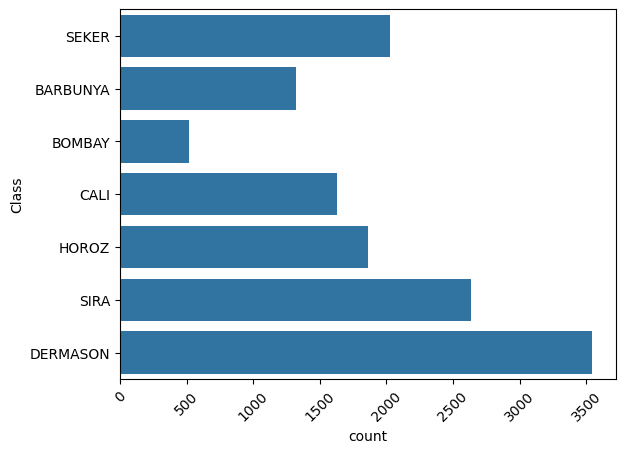

In [16]:
sns.countplot(df['Class'])
plt.xticks(rotation=45)
plt.show()

In [17]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(random_state=42)

In [18]:
X = df.drop('Class',axis=1)
y = df['Class']

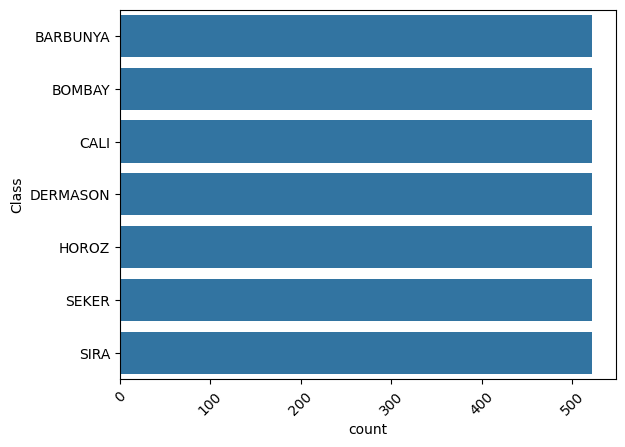

In [19]:
X_over,y_over = undersample.fit_resample(X,y)
sns.countplot(y_over)
plt.xticks(rotation=45)
plt.show()

In [20]:
df.shape

(13543, 17)

# CODIFICACIÓN DE VARIABLES CATEGORICAS

In [21]:
list(np.unique(y_over))

['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']

In [22]:
y_over.replace(['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'],[1,2,3,4,5,6,7],inplace=True)
list(np.unique(y_over))

<ipython-input-22-570ccaf4564e>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  y_over.replace(['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA'],[1,2,3,4,5,6,7],inplace=True)


[1, 2, 3, 4, 5, 6, 7]

In [23]:
df_corr = X_over
df_corr['Class'] = y_over
df_corr

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
2754,70776,1060.894,386.619944,234.100208,1.651515,0.795842,71978,300.191276,0.775763,0.983300,0.790227,0.776451,0.005463,0.001225,0.602875,0.995658,1
2506,66370,1004.139,339.287072,249.883085,1.357783,0.676443,67637,290.697280,0.720536,0.981268,0.827169,0.856789,0.005112,0.001699,0.734087,0.996731,1
2267,60736,985.501,342.445302,226.741775,1.510288,0.749393,61680,278.085377,0.789353,0.984695,0.785854,0.812058,0.005638,0.001512,0.659438,0.995941,1
2449,65219,1011.110,353.650546,235.308999,1.502920,0.746512,66672,288.165594,0.719436,0.978207,0.801654,0.814831,0.005423,0.001475,0.663950,0.997864,1
2076,51332,889.637,330.822804,198.618899,1.665616,0.799716,52283,255.651975,0.751688,0.981811,0.815028,0.772776,0.006445,0.001418,0.597183,0.994678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8692,44358,785.631,288.303275,196.970714,1.463686,0.730225,44898,237.651761,0.791937,0.987973,0.903118,0.824312,0.006499,0.001851,0.679490,0.994560,7
7578,37641,742.538,284.313737,169.740814,1.674987,0.802227,38112,218.920099,0.744187,0.987642,0.857894,0.769995,0.007553,0.001638,0.592892,0.993087,7
7924,40668,747.000,271.731569,191.687622,1.417575,0.708780,41257,227.552424,0.712162,0.985724,0.915844,0.837416,0.006682,0.002027,0.701266,0.994097,7
9972,53233,893.511,329.969126,206.375684,1.598876,0.780273,54022,260.342775,0.689154,0.985395,0.837898,0.788991,0.006199,0.001482,0.622507,0.995312,7


# CORRELACIONES

In [24]:
corr_matrix = df_corr.corr()
corr_class = corr_matrix['Class']
corr_class.sort_values(ascending=False)

,Class
Class,1.000000
ShapeFactor1,0.595998
ShapeFactor2,0.493776
roundness,0.436332
Solidity,0.320507
ShapeFactor4,0.202544
ShapeFactor3,0.177881
Compactness,0.160470
Extent,-0.084210
AspectRation,-0.100902


<Axes: >

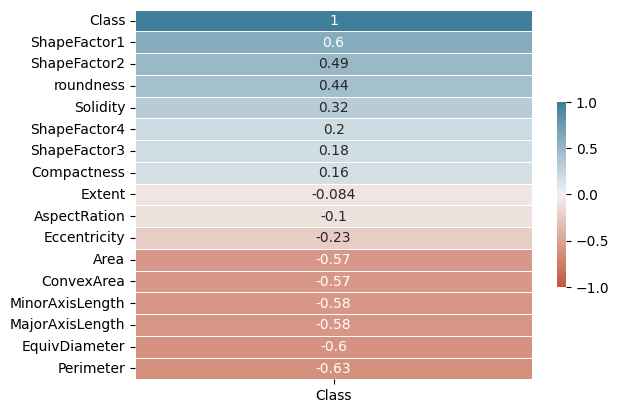

In [25]:

sns.heatmap(
    data=corr_class.sort_values(ascending=False).to_frame(),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True
)

In [26]:
corr_filtered = corr_class[corr_class > 0]
cols = corr_filtered.index.tolist()
cols

['Solidity',
 'roundness',
 'Compactness',
 'ShapeFactor1',
 'ShapeFactor2',
 'ShapeFactor3',
 'ShapeFactor4',
 'Class']

# ENTRENAMIENTO DEL MODELO

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay

In [28]:
X_train,X_test,y_train,y_test = train_test_split(X_over,y_over,random_state=42,shuffle=True,test_size=0.2)

# ESTRATEGIAS PARA MANEJAR PROBLEMAS DE CLASIFICACIÓN MULTICLASE

* OVER(ONE VS REST) : esta estrategia entrena un clasificador binario por cada clase.
* multinomial : rata todas las clases al mismo tiempo en un solo modelo de clasificación multiclase.

In [29]:
model_ovr = LogisticRegression(multi_class='ovr',solver='lbfgs',max_iter=500)
model_ovr.fit(X_train,y_train)
y_pred_ovr = model_ovr.predict(X_test)
print(f"Ovr Accuracy : {accuracy_score(y_test,y_pred_ovr)}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Ovr Accuracy : 0.9890560875512996


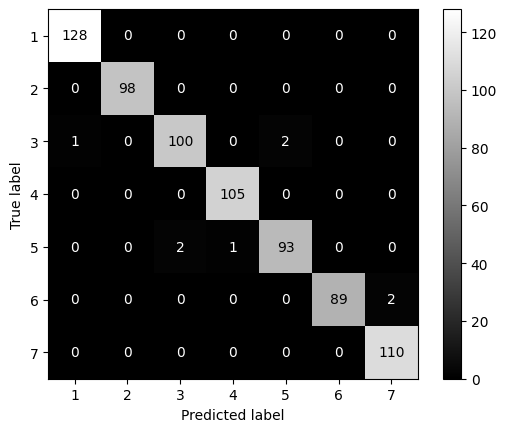

In [30]:
cm = confusion_matrix(y_test,y_pred_ovr,labels=model_ovr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_ovr.classes_)
disp.plot(cmap='gray')
plt.show()

In [31]:
model_multinomial = LogisticRegression(multi_class='multinomial',solver='lbfgs',max_iter=500)
model_multinomial.fit(X_train,y_train)
y_pred_multinomial = model_multinomial.predict(X_test)
print(f"Ovr Multinomial : {accuracy_score(y_test,y_pred_multinomial)}")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Ovr Multinomial : 0.7975376196990424


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


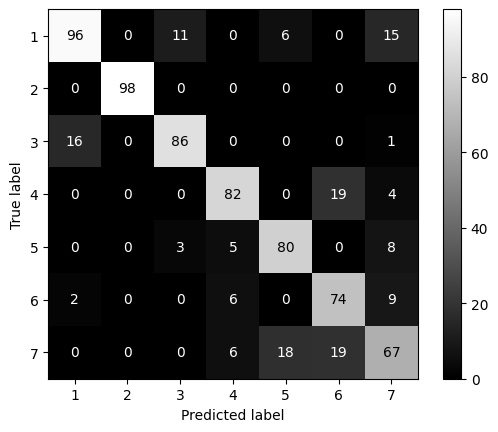

In [32]:
cm = confusion_matrix(y_test,y_pred_multinomial,labels=model_multinomial.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_multinomial.classes_)
disp.plot(cmap='gray')
plt.show()

# COMPARAMOS DISTINTOS PARAMETROS

In [33]:
multiclass = ['ovr','multinomial']
solver_list = ['newton-cg','lbfgs','sag', 'saga']
scores = []
params = []

def logistic_model(C_,solver_,multiclass_):
  logistic_regression_model = LogisticRegression(random_state=42,solver=solver_,multi_class=multiclass_,n_jobs=-1,C=C_)
  return logistic_regression_model

for i in multiclass:
  for j in solver_list:
    try:
      model = logistic_model(1,j,i)
      model.fit(X_train,y_train)
      predictions = model.predict(X_test)
      params.append(i + '-' + j)
      accuraccy = accuracy_score(y_test,predictions)
      scores.append(accuraccy)
    except:
      None

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'ovr-newton-cg'),
  Text(1, 0, 'ovr-lbfgs'),
  Text(2, 0, 'ovr-sag'),
  Text(3, 0, 'ovr-saga'),
  Text(4, 0, 'multinomial-newton-cg'),
  Text(5, 0, 'multinomial-lbfgs'),
  Text(6, 0, 'multinomial-sag'),
  Text(7, 0, 'multinomial-saga')])

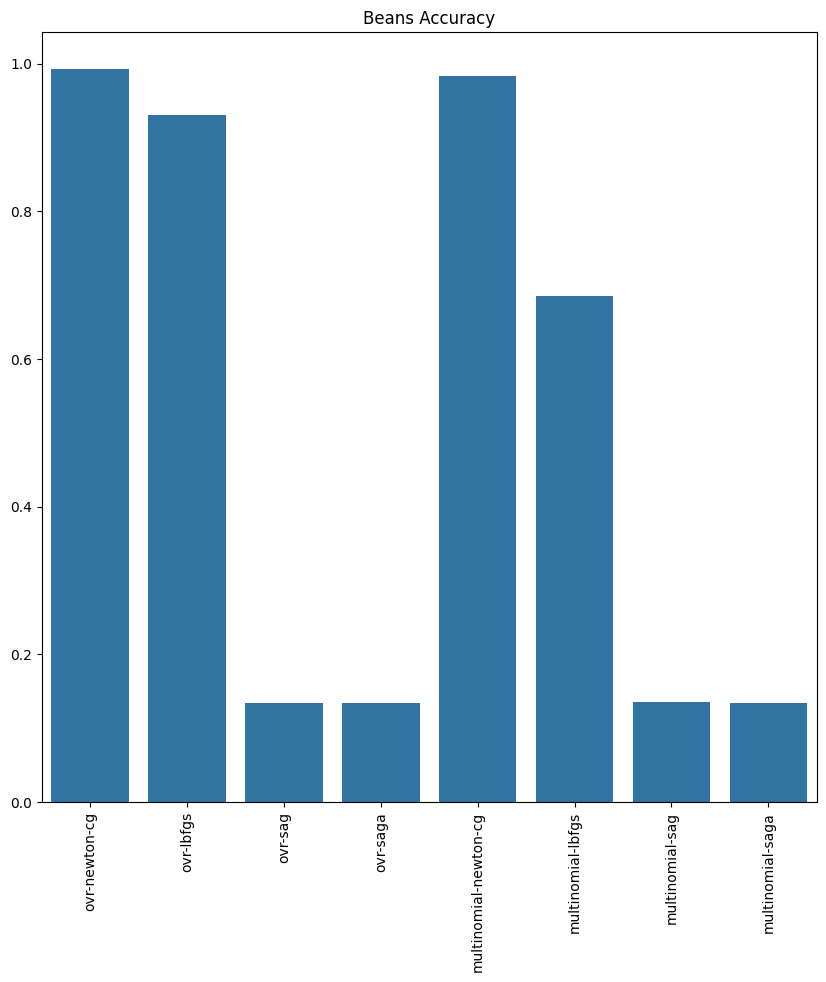

In [34]:
fig = plt.figure(figsize=(10,10))
sns.barplot(x=params,y=scores).set_title('Beans Accuracy')
plt.xticks(rotation=90)